# **Essential Imports**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
import joblib
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier


In [ ]:
!gdown --id 14fALMbCHRV-HDflM1Z7yUTySb1hFOal-

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14fALMbCHRV-HDflM1Z7yUTySb1hFOal-
To: /content/Language_det_train.csv
100% 1.81M/1.81M [00:00<00:00, 143MB/s]


# Downloads

In [ ]:
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stop_words = set(stopwords.words('english'))

# Importing Data & Visualization

In [ ]:
Data = pd.read_csv("/content/Language_det_train.csv")
Data.head()

,Text,Language
0,στη Γαλλία νωρίτερα ραντεβού χρησιμοποιήθηκε α...,Greek
1,e con ciò lei salì nella sua carrozza e senza ...,Italian
2,buna değmez.,Turkish
3,Viktiga skillnader är att i en wiki lagras sid...,Sweedish
4,تعرف على ما إذا كان شخص ما يقول نكتة رائعة يمك...,Arabic


In [ ]:
print(Data.shape[0],"Articles")

9820 Articles


In [ ]:
Categories = Data["Language"].value_counts()
Categories

Language
English       1316
French         963
Spanish        778
Portugeese     702
Italian        663
Russian        657
Sweedish       642
Malayalam      564
Dutch          519
Arabic         509
Turkish        450
German         446
Tamil          446
Danish         407
Kannada        351
Greek          347
Hindi           60
Name: count, dtype: int64

In [ ]:
Categories.sum()

9820

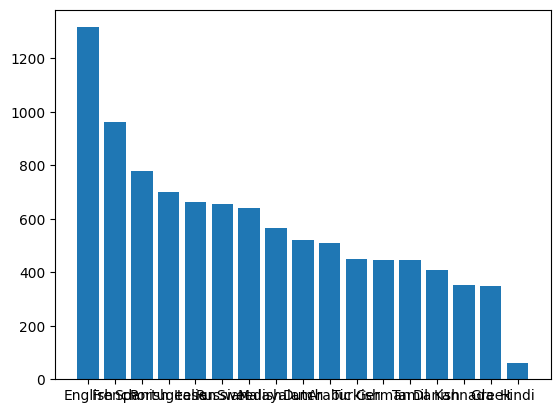

In [ ]:
plt.bar(Categories.index,Categories.values)
plt.show()

# Preprocessing


***1- Drop irrelevant Columns***

***2- Convert all the text to lower case***

***3- Remove all irrelevant characters***

***4- Remove all StopWords***

***5- Encode Categories***

In [ ]:
def DropIrrelevant(Data,cols):
  return Data.drop(cols,axis=1)

# def removeStopWords(text):
#   text = text.split()
#   newText = ""
#   for word in text:
#     if word not in stop_words:
#       newText += word+" "
#   return newText.strip()

def applyFuncs(Data, textLabel):
  Data[textLabel] = Data[textLabel].apply(lambda x : x.lower())
  # Data[textLabel] = Data[textLabel].apply(lambda x : re.sub("[^a-z0-9\s]","",x))
  # Data[textLabel] = Data[textLabel].apply(lambda x : re.sub("\s+"," ",x))
  # Data[textLabel] = Data[textLabel].apply(lambda x : removeStopWords(x))
  return Data

def Encoding(Data, labelCol):
  encoder = LabelEncoder()
  output=encoder.fit_transform(Data[labelCol])
  joblib.dump(encoder,"/content/encoder.pkl")
  return output

******



# Preprocessing Pipeline

In [ ]:
label_counts = Data['Language'].value_counts()

# Filter labels with counts less than 100
labels_to_drop = label_counts[label_counts < 500].index

# Drop rows with labels in 'labels_to_drop'
Data = Data[~Data['Language'].isin(labels_to_drop)]

In [ ]:
def PreprocessPipeline(DataFrameObj, textCol, labelCol):
  Irrelevant_Cols = np.setdiff1d(DataFrameObj.columns, np.array([textCol, labelCol]))
  DataFrameObj = DropIrrelevant(DataFrameObj , list(Irrelevant_Cols))
  DataFrameObj = applyFuncs(DataFrameObj, textCol)
  DataFrameObj[labelCol] = Encoding(DataFrameObj, labelCol)
  return DataFrameObj

Data = PreprocessPipeline(Data, "Text", "Language")
Data.head()

,Text,Language
1,e con ciò lei salì nella sua carrozza e senza ...,4
3,viktiga skillnader är att i en wiki lagras sid...,9
4,تعرف على ما إذا كان شخص ما يقول نكتة رائعة يمك...,0
6,"o ex-editor chefe da encyclopædia britannica, ...",6
7,qual'è il tuo punto di vista?,4


In [ ]:
# ALL_DATA=pd.DataFrame()
# for i in Data["Language"].value_counts().index:
#    Data_df = Data[Data['Language'] == i]

# # Select the first 500 rows
#    selected_rows = Data_df.head(500)

# # Concatenate selected_rows into a single DataFrame
#    ALL_DATA = pd.concat([ALL_DATA,selected_rows])

# Feature Selection

In [ ]:
def createFeatures(DataFrameObj, textCol):
  vectorizer = TfidfVectorizer()
  features = vectorizer.fit_transform(DataFrameObj[textCol])
  joblib.dump(vectorizer,"/content/vectorizer.pkl")
  return features.toarray()

In [ ]:
# from gensim.models import Word2Vec
# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download('punkt')
# def createFeatures(DataFrameObj, textCol):
#     # Tokenize the text
#     tokenized_text = DataFrameObj[textCol].apply(word_tokenize)

#     # Train Word2Vec model
#     word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

#     # Generate features
#     features = []
#     for doc in tokenized_text:
#         doc_vec = np.zeros((100,))
#         count = 0
#         for word in doc:
#             if word in word2vec_model.wv:
#                 doc_vec += word2vec_model.wv[word]
#                 count += 1
#         if count != 0:
#             doc_vec /= count
#         features.append(doc_vec)

#     return np.array(features)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
features = createFeatures(Data, "Text")

# Apply Models



1.   Gaussian NB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, Data["Language"], test_size=0.2, random_state=7, stratify=Data["Language"])

In [ ]:
NB_Model = GaussianNB()
NB_Model.fit(X_train,y_train)
y_predict = NB_Model.predict(X_test)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_predict)*100)

Gaussian Naive Bayes model accuracy(in %): 97.88106630211894


In [ ]:
joblib.dump(NB_Model,"/content/NB_Model.pkl")

['/content/NB_Model.pkl']

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.96      1.00      0.98       104
           2       1.00      0.97      0.99       263
           3       0.99      0.99      0.99       193
           4       0.99      1.00      0.99       133
           5       0.93      0.99      0.96       113
           6       0.95      0.98      0.96       140
           7       0.99      0.98      0.99       131
           8       0.99      0.94      0.96       156
           9       0.96      0.98      0.97       128

    accuracy                           0.98      1463
   macro avg       0.98      0.98      0.98      1463
weighted avg       0.98      0.98      0.98      1463



In [ ]:
conf_NB_Model=confusion_matrix(y_test,y_predict)

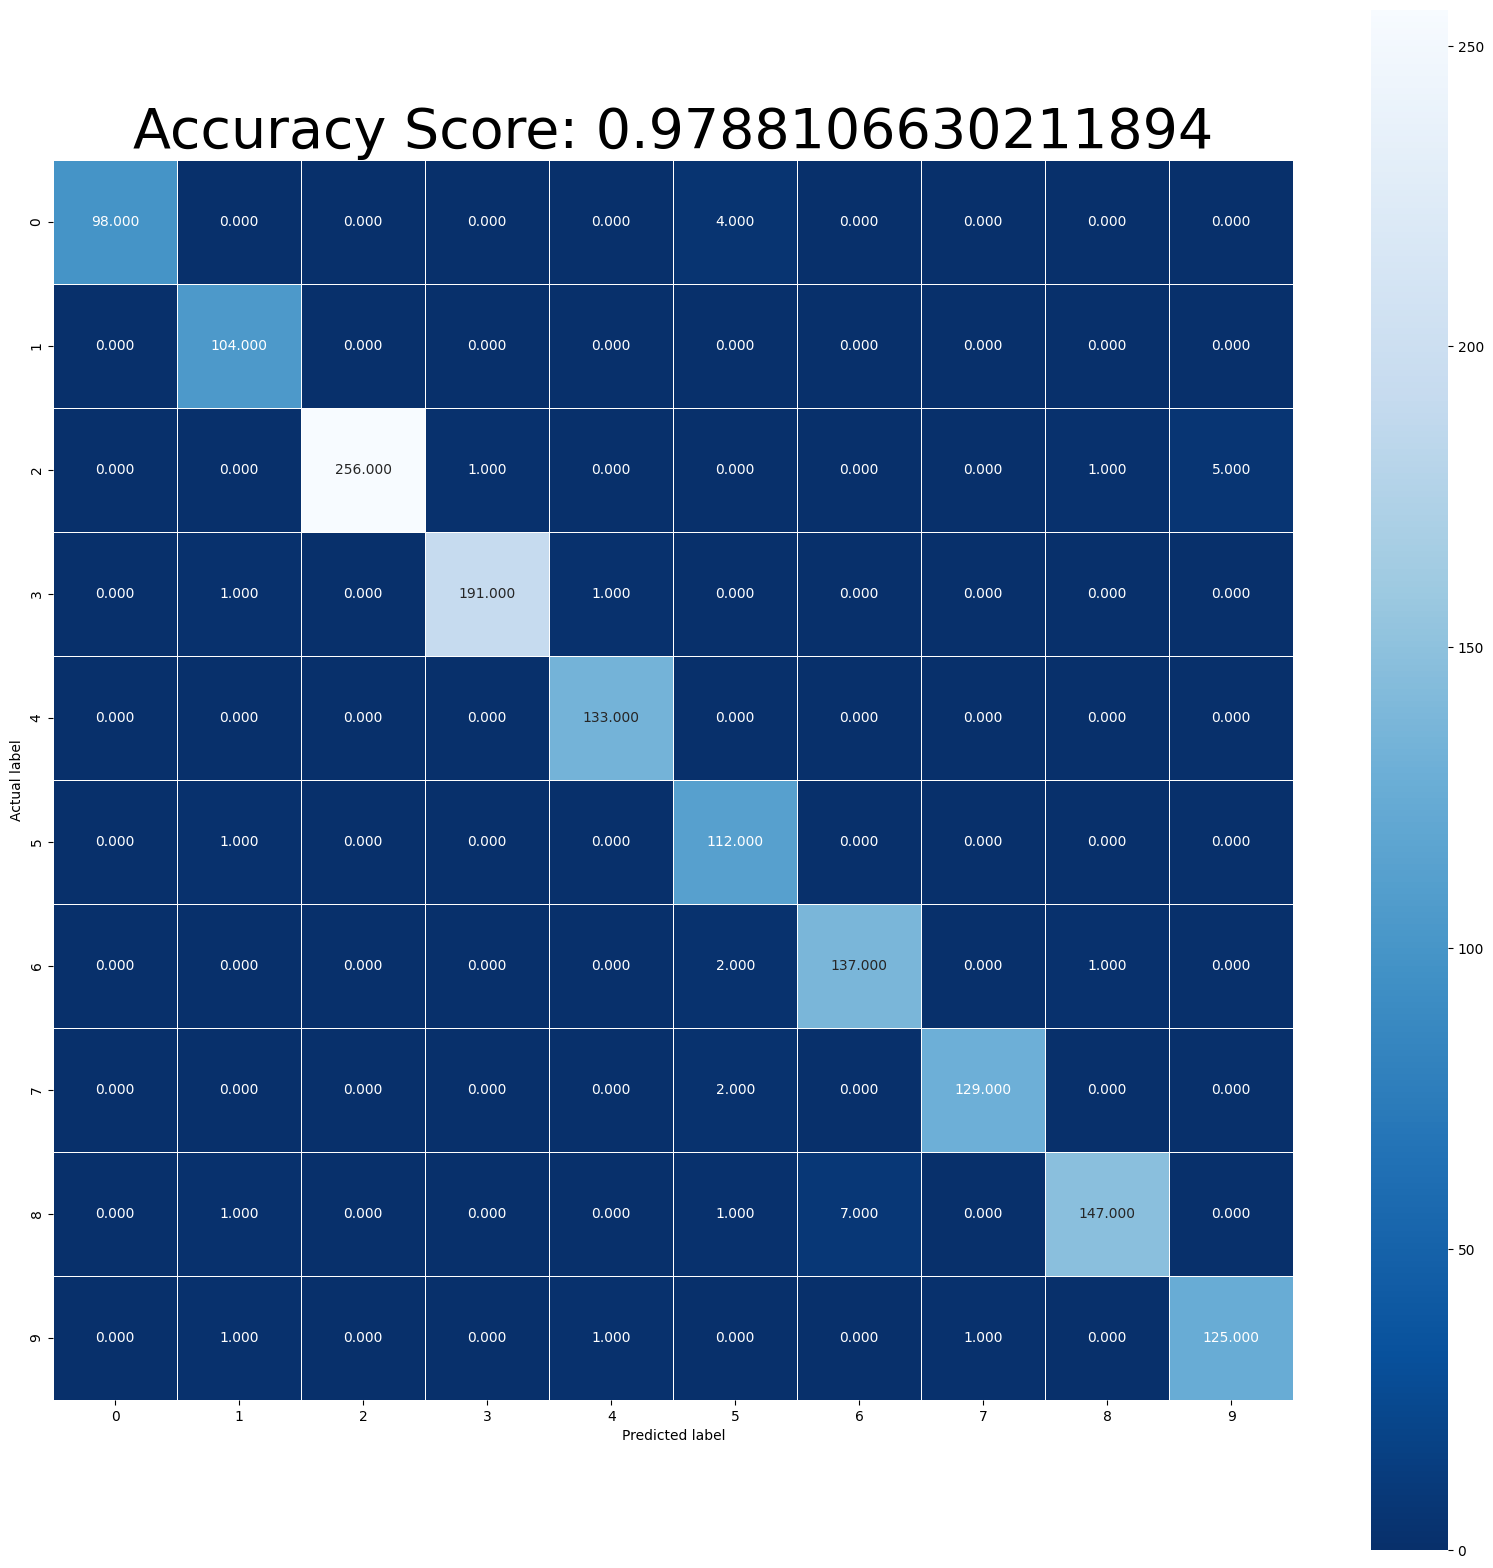

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_NB_Model, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_predict))
plt.title(all_sample_title, size = 40);

2. Random Forest

In [28]:

classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)
print(classifier.score(X_test,y_test))

0.9446343130553657


In [29]:
conf_RandomForestClassifier=confusion_matrix(y_test,y_pred)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       102
           1       0.98      0.97      0.98       104
           2       0.98      0.97      0.98       263
           3       0.98      0.94      0.96       193
           4       0.98      0.94      0.96       133
           5       0.65      1.00      0.79       113
           6       0.99      0.95      0.97       140
           7       1.00      0.95      0.98       131
           8       0.94      0.90      0.92       156
           9       1.00      0.95      0.98       128

    accuracy                           0.94      1463
   macro avg       0.95      0.94      0.94      1463
weighted avg       0.96      0.94      0.95      1463



In [32]:
joblib.dump(classifier,"/content/RFC.pkl")

['/content/RFC.pkl']

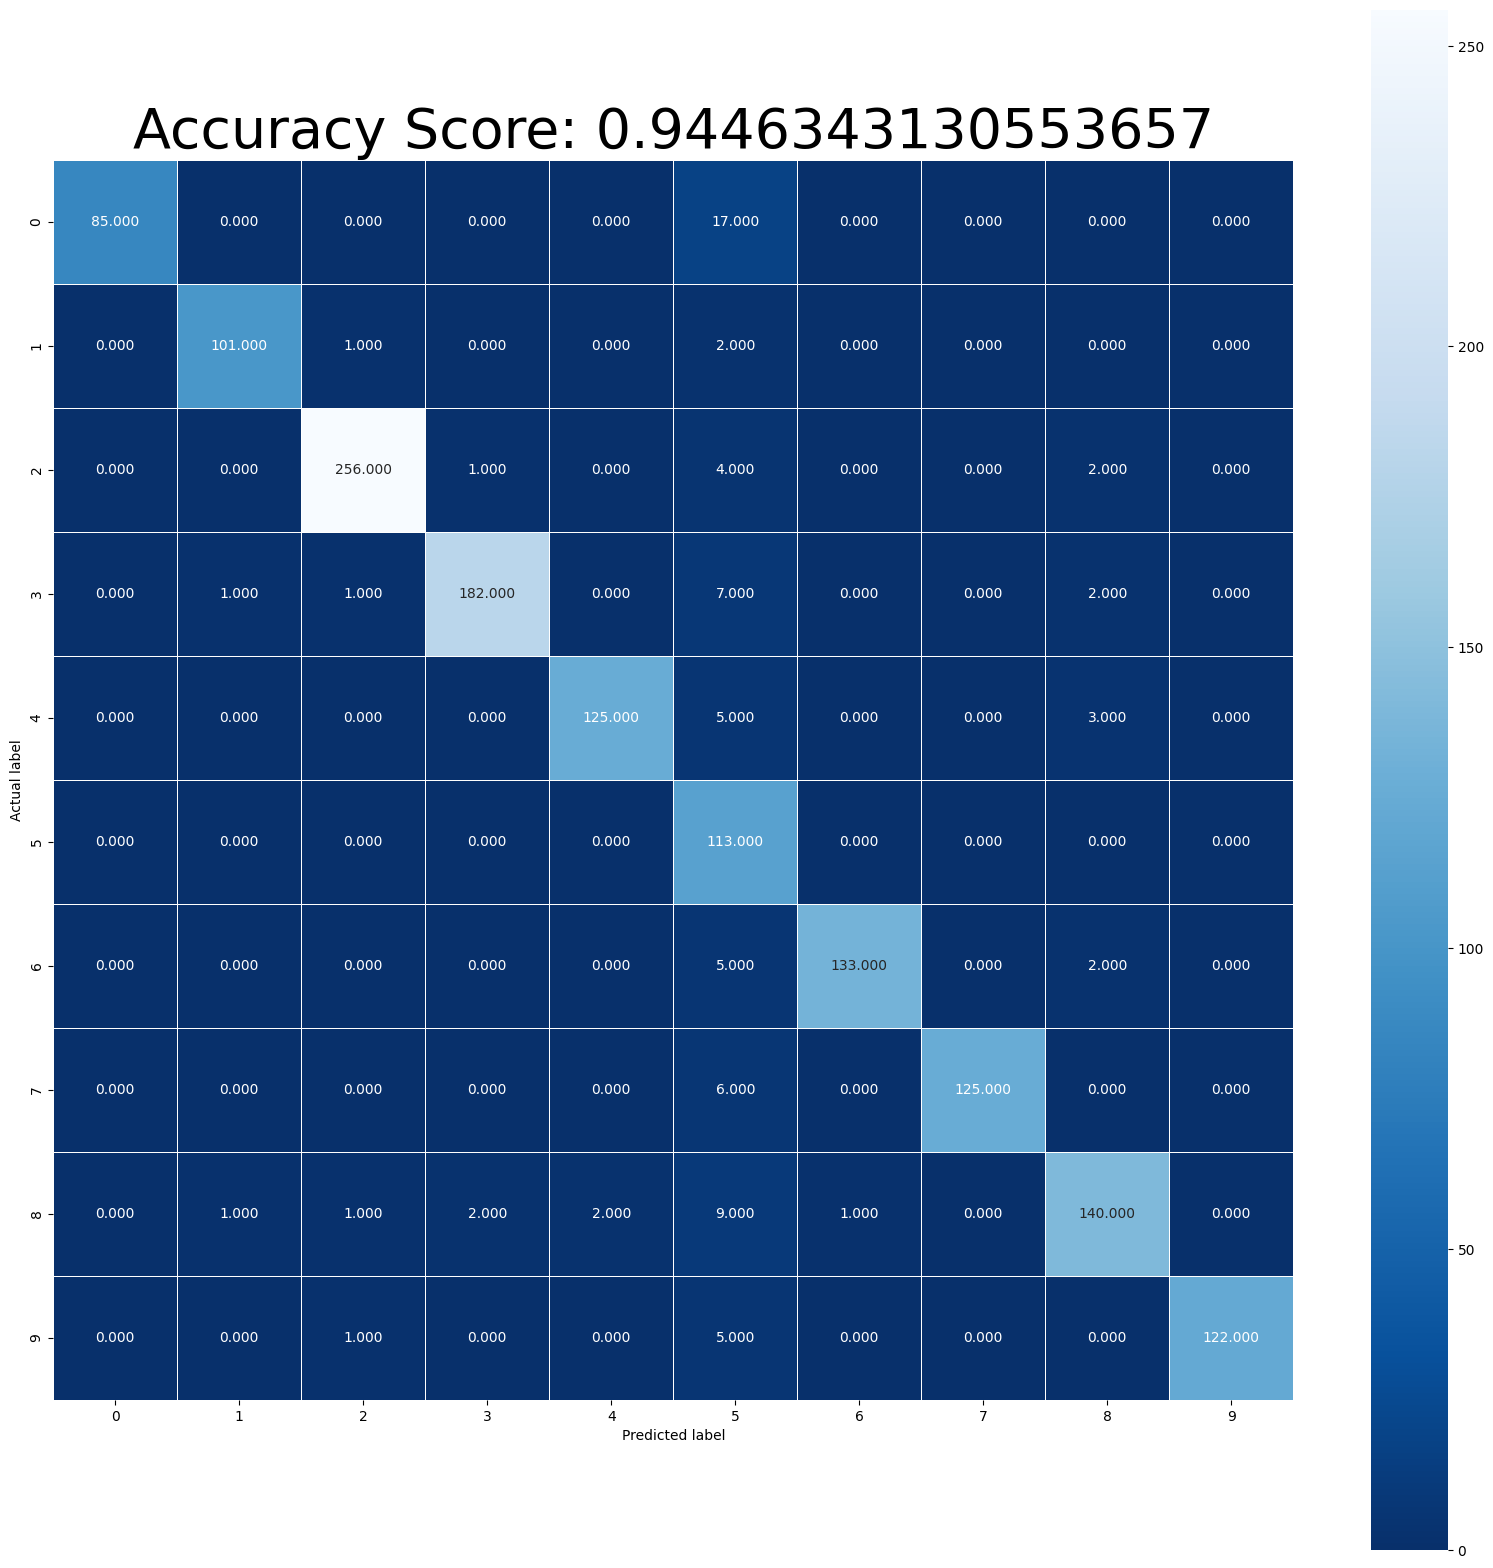

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_RandomForestClassifier, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 40);

3. KNN

In [33]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.657552973342447


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       102
           1       1.00      0.90      0.95       104
           2       0.99      0.90      0.94       263
           3       0.99      0.92      0.96       193
           4       1.00      0.90      0.95       133
           5       0.19      1.00      0.31       113
           6       0.00      0.00      0.00       140
           7       1.00      0.89      0.94       131
           8       1.00      0.03      0.05       156
           9       1.00      0.03      0.06       128

    accuracy                           0.66      1463
   macro avg       0.82      0.65      0.61      1463
weighted avg       0.84      0.66      0.64      1463



In [35]:
conf_KNeighborsClassifier=confusion_matrix(y_test,y_pred)

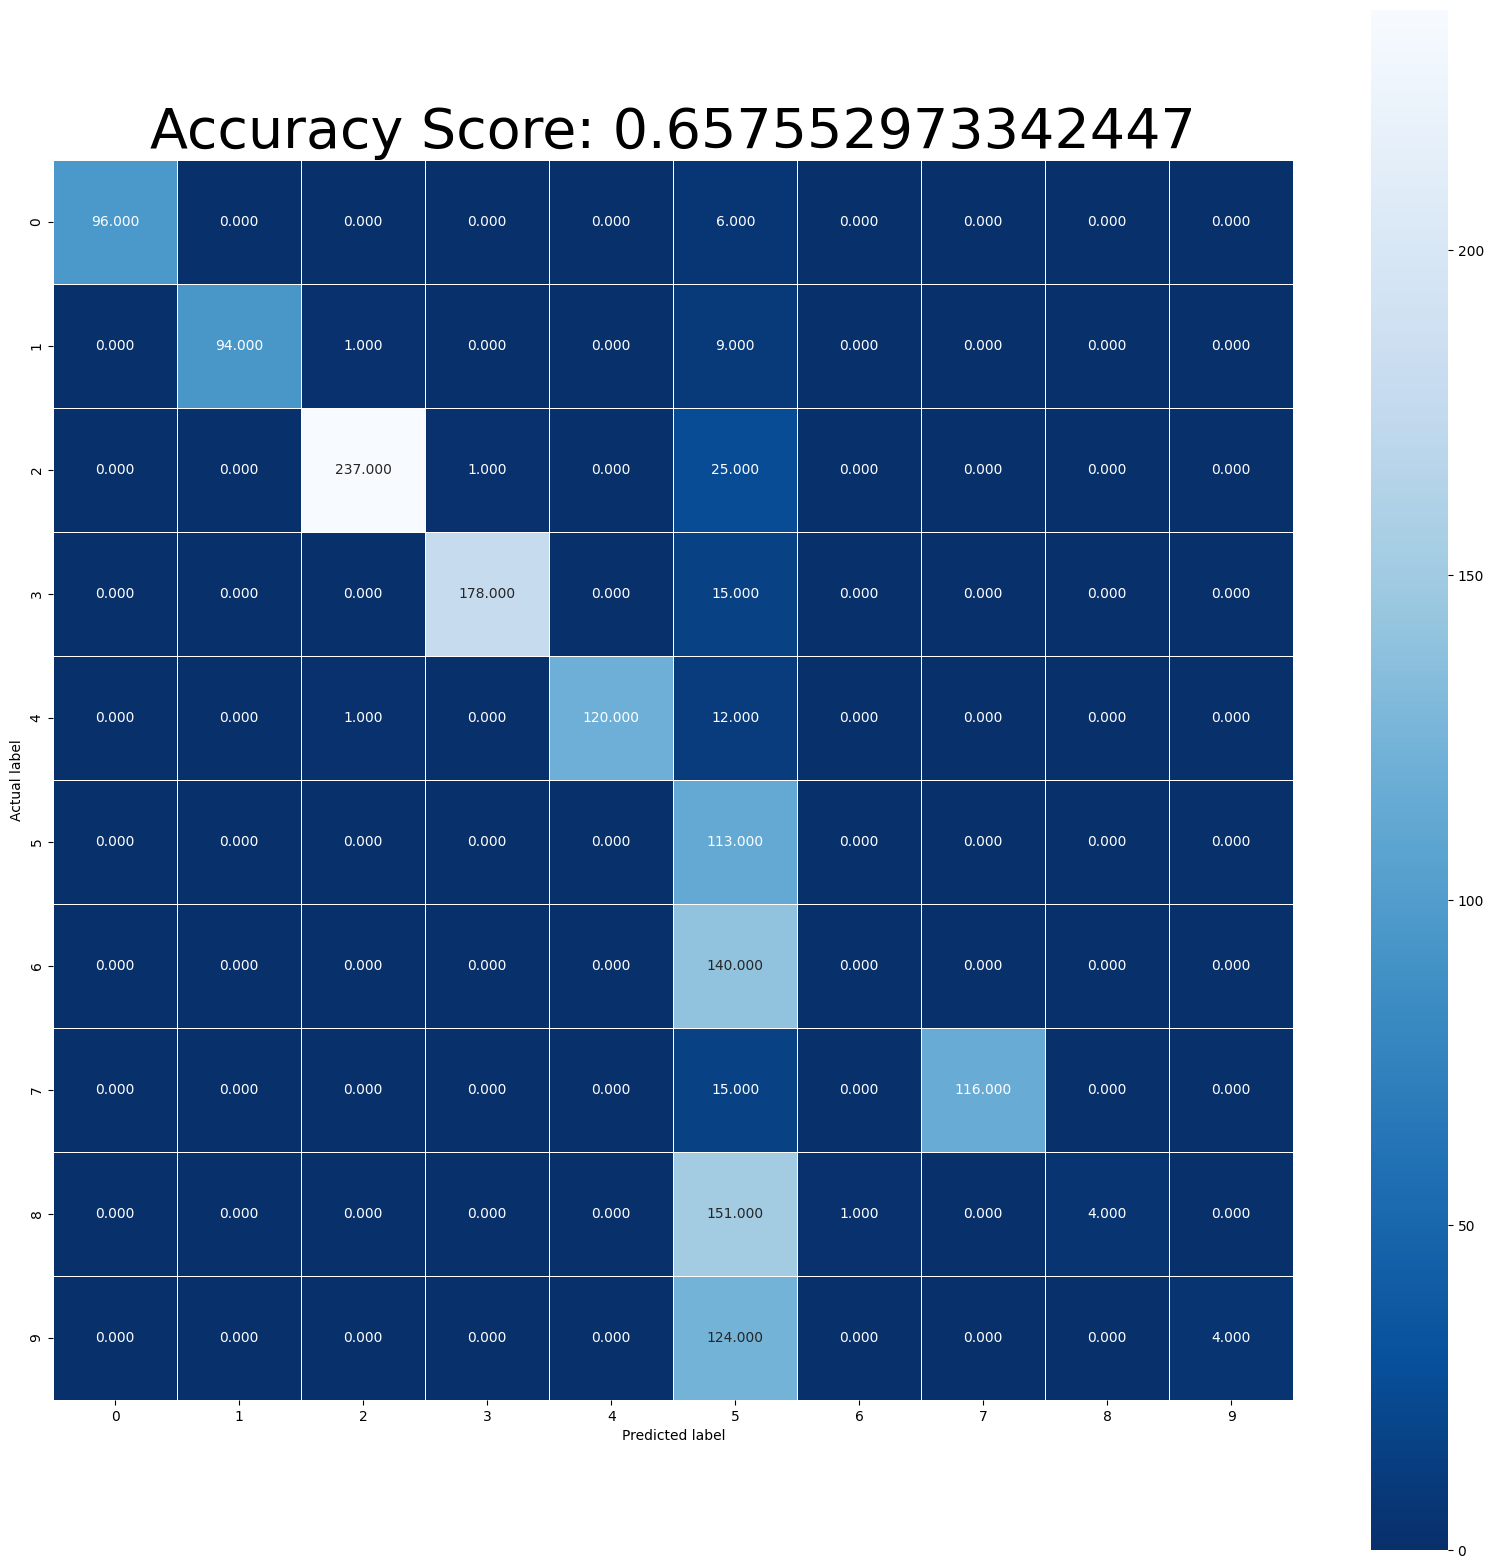

In [36]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_KNeighborsClassifier, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 40);

4. Logistic Regression

In [37]:
# X_train, X_test, y_train, y_test = train_test_split(features, Data["Language"], test_size=0.2, random_state=7, stratify=Data["Language"])
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9685577580314423


In [40]:
joblib.dump(logreg,"/content/logreg.pkl")

['/content/logreg.pkl']

In [38]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       102
           1       0.96      1.00      0.98       104
           2       1.00      0.97      0.99       263
           3       0.99      0.99      0.99       193
           4       0.99      1.00      0.99       133
           5       0.93      0.99      0.96       113
           6       0.95      0.98      0.96       140
           7       0.99      0.98      0.99       131
           8       0.99      0.94      0.96       156
           9       0.96      0.98      0.97       128

    accuracy                           0.98      1463
   macro avg       0.98      0.98      0.98      1463
weighted avg       0.98      0.98      0.98      1463



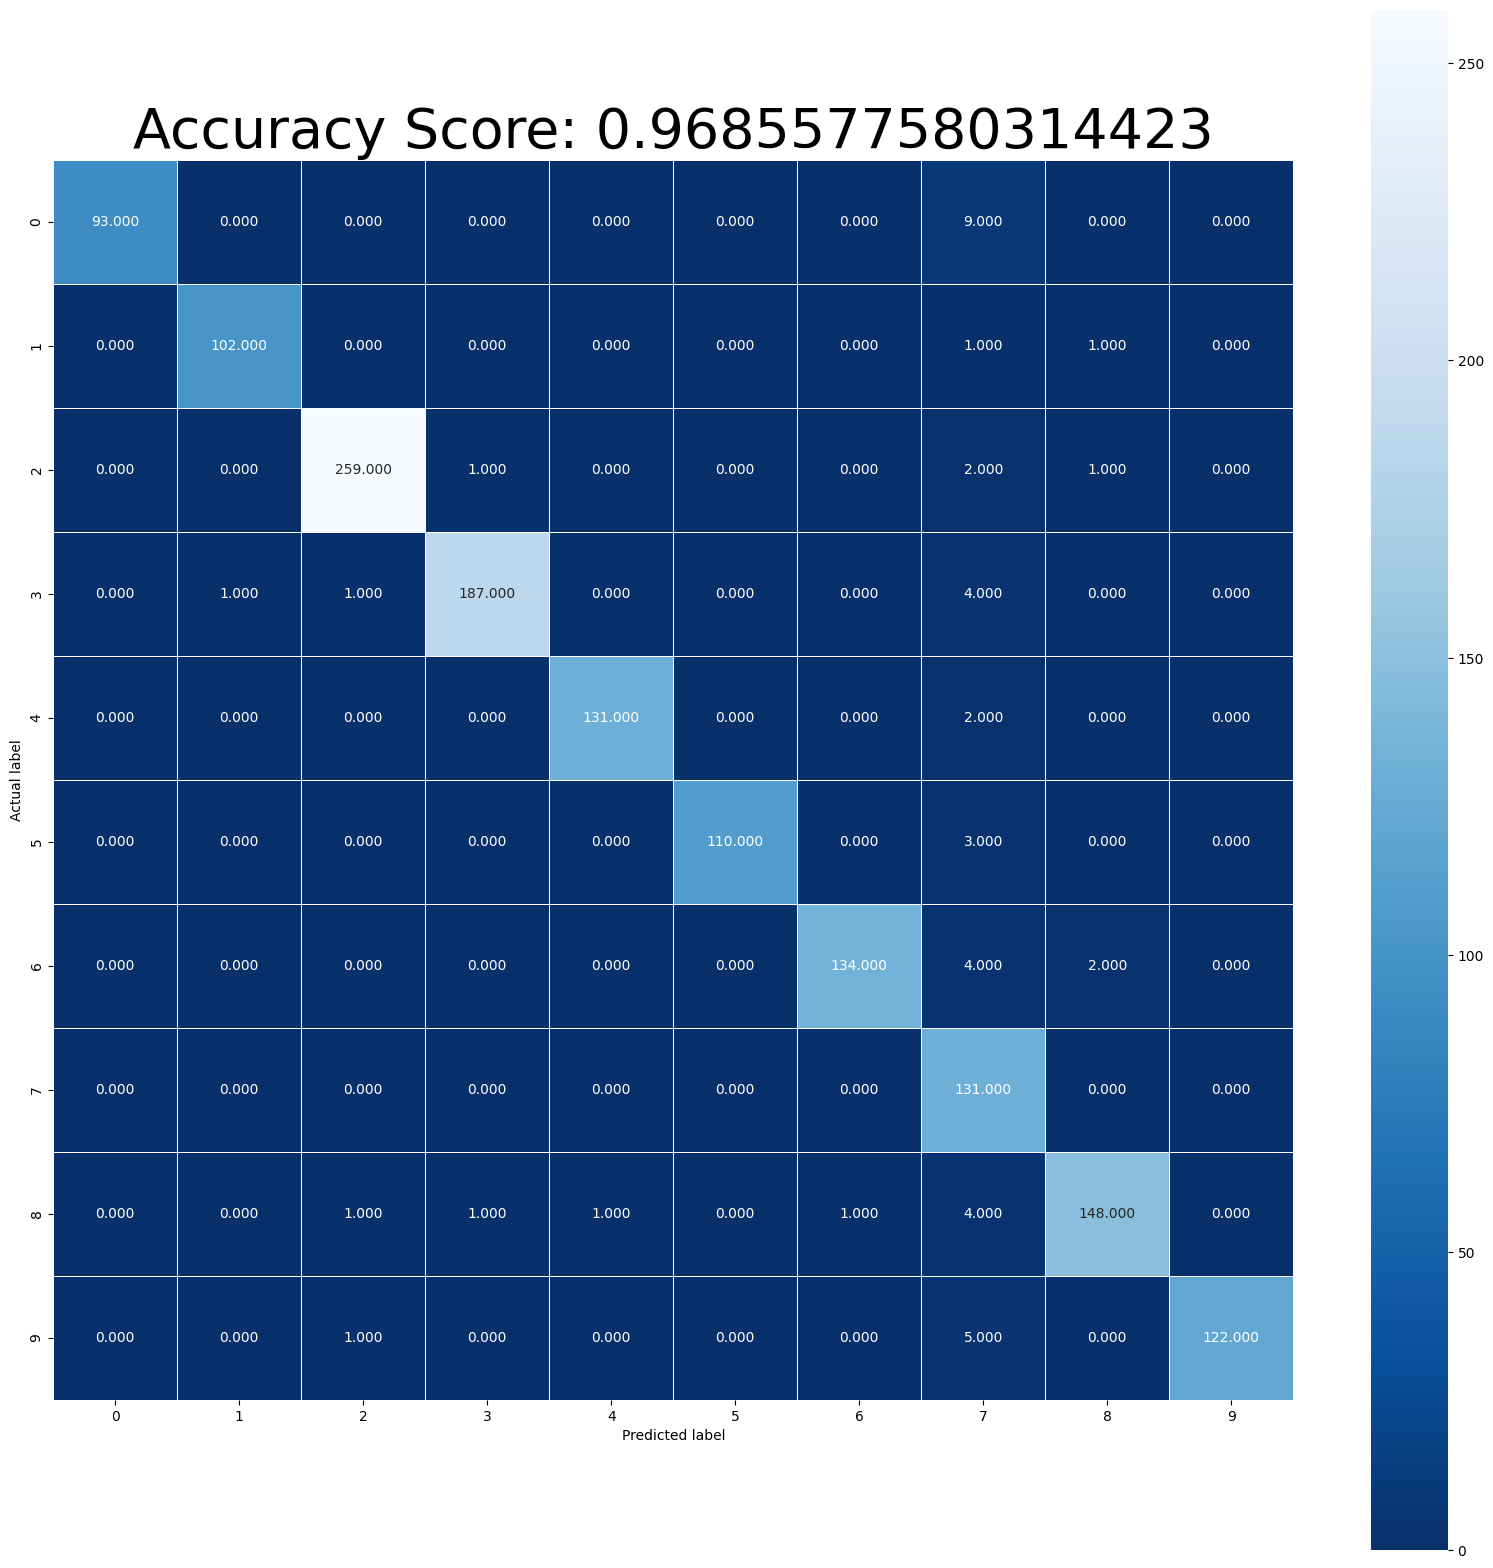

In [39]:
conf_LogReg=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(20,20))
sns.heatmap(conf_LogReg, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 40);

5. SVM

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)


In [ ]:
svm_model.fit(X_train, y_train)

In [ ]:
print('Best score for training data:', svm_model.best_score_,"\n")

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n")
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
conf_svm=confusion_matrix(y_test,y_pred)

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(conf_svm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 40);

6. **SGD**

In [41]:
sgd=SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
sgd.fit(X_train, y_train)



SGDClassifier(loss='modified_huber', random_state=101)

In [42]:
y_pred = sgd.predict(X_test)

In [43]:
AdaBoostClassifier_metrics = metrics.confusion_matrix(y_test, y_pred)


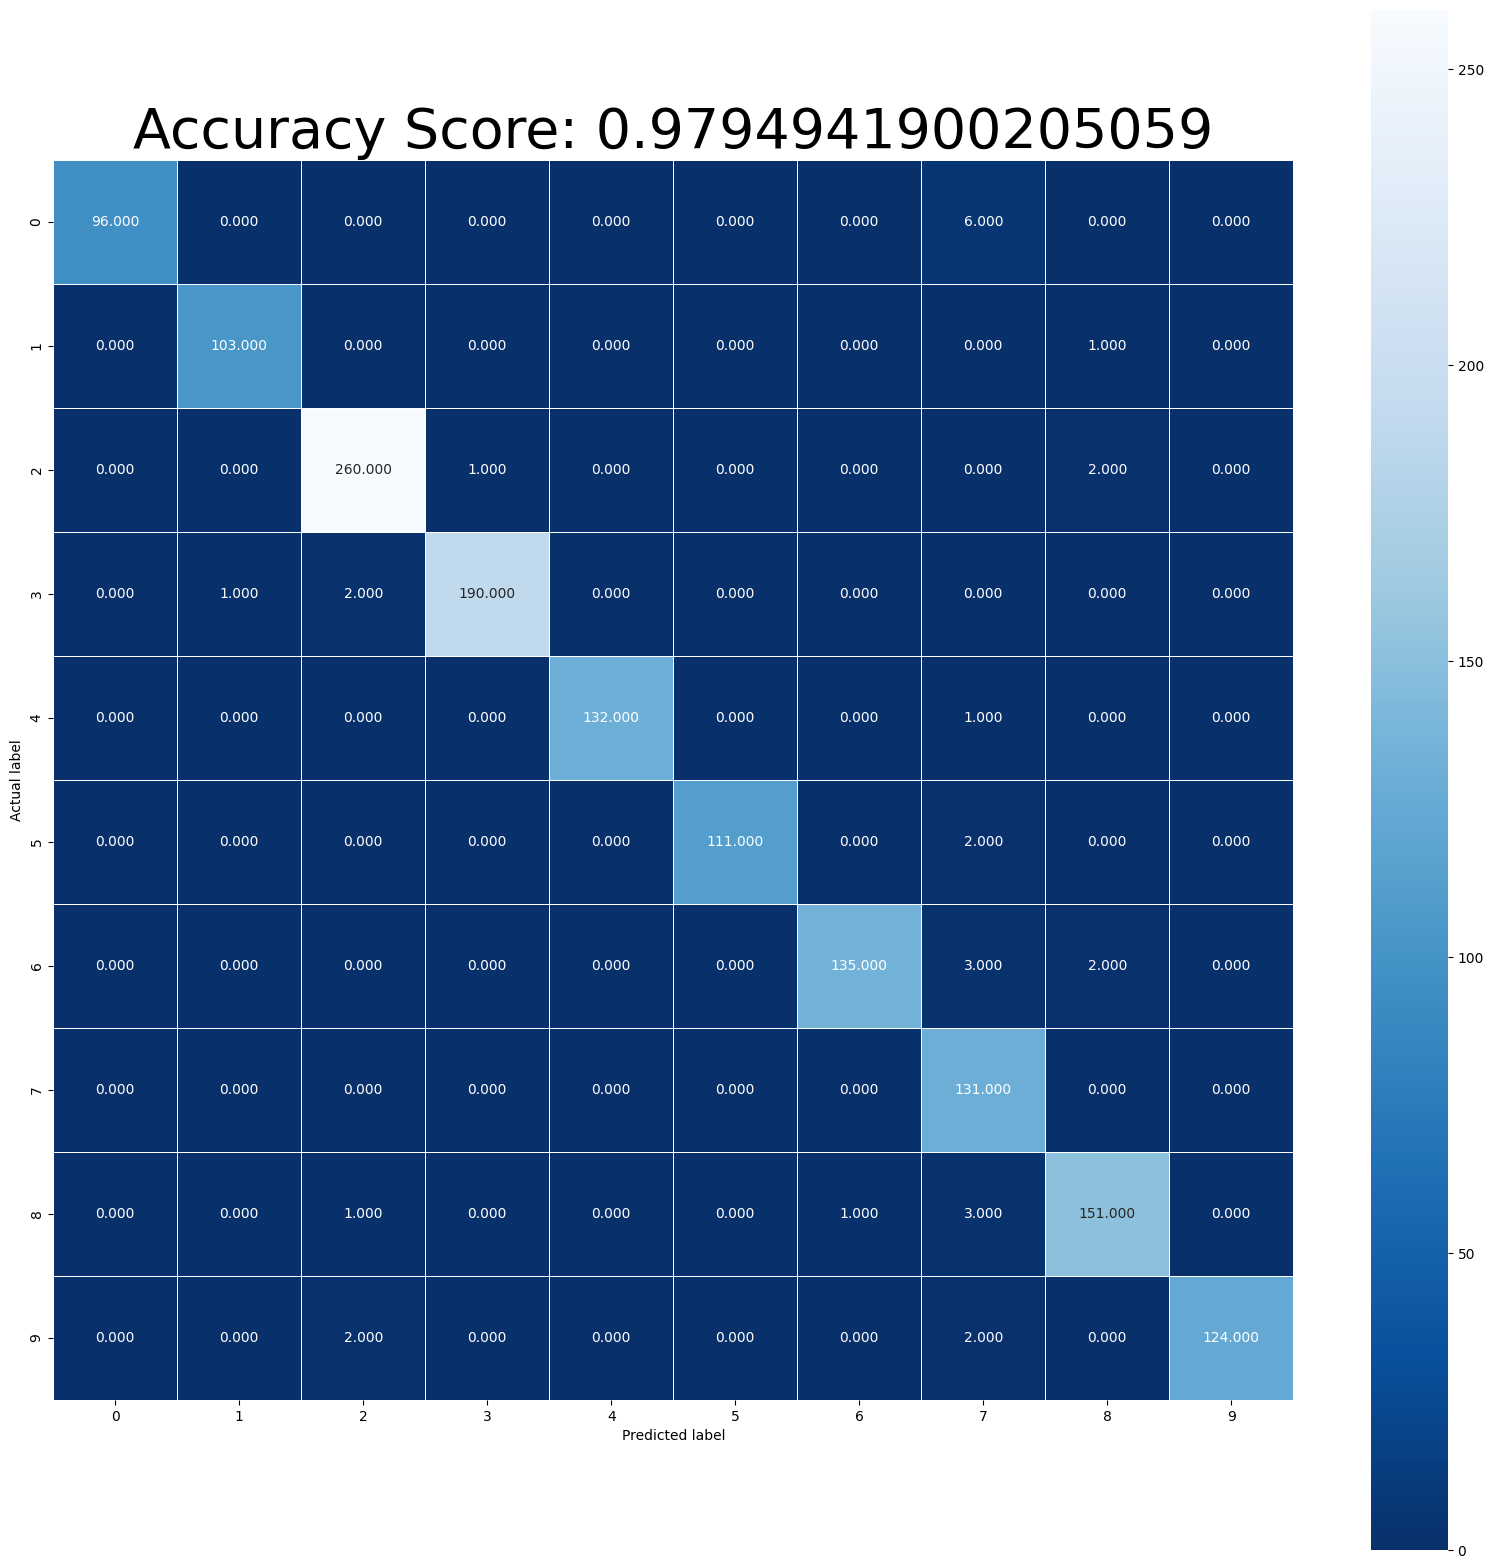

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(AdaBoostClassifier_metrics, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_pred,y_test))
plt.title(all_sample_title, size = 40);

In [45]:
joblib.dump(sgd,"/content/sgd.pkl")

['/content/sgd.pkl']